# Visualización de Datos (Plots)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("customer-churn-model/Customer Churn Model.txt")
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [7]:
data.shape

(3333, 21)

## 1. Scatter Plot

In [8]:
%matplotlib inline

<Axes: xlabel='Day Mins', ylabel='Day Charge'>

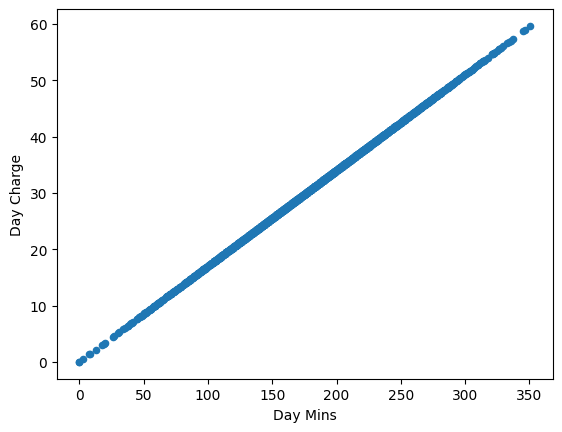

In [9]:
# Usar la función .plot(kind="tipo_de_plot", x="x_data", y="y_data")
data.plot(kind="scatter", x="Day Mins", y="Day Charge")

<Axes: xlabel='Night Mins', ylabel='Night Charge'>

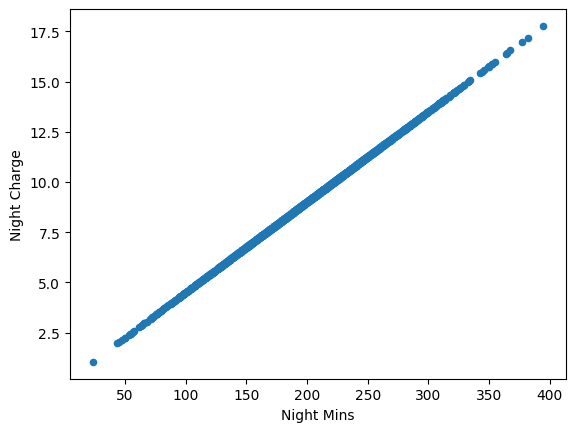

In [10]:
data.plot(kind="scatter", x="Night Mins", y="Night Charge")

<Axes: xlabel='Night Calls', ylabel='Night Charge'>

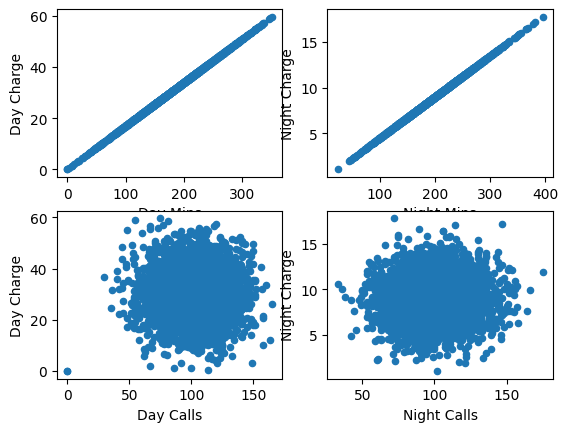

In [11]:
figure, axs = plt.subplots(2,2, sharey=False, sharex=False)
data.plot(kind="scatter",x="Day Mins",y="Day Charge", ax=axs[0][0])
data.plot(kind="scatter",x="Night Mins",y="Night Charge", ax=axs[0][1])
data.plot(kind="scatter",x="Day Calls",y="Day Charge", ax=axs[1][0])
data.plot(kind="scatter",x="Night Calls",y="Night Charge", ax=axs[1][1])

<Axes: xlabel='Night Calls', ylabel='Night Charge'>

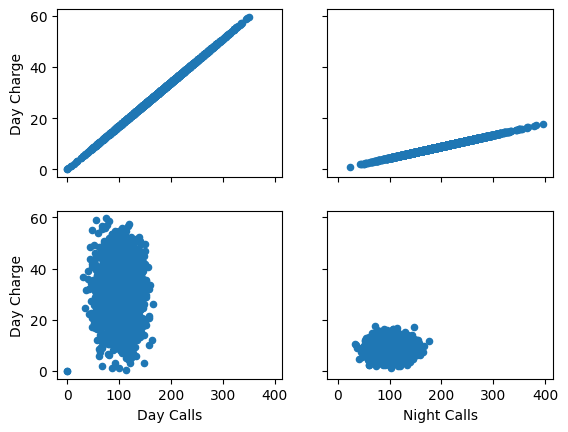

In [12]:
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)
data.plot(kind="scatter",x="Day Mins",y="Day Charge", ax=axs[0][0])
data.plot(kind="scatter",x="Night Mins",y="Night Charge", ax=axs[0][1])
data.plot(kind="scatter",x="Day Calls",y="Day Charge", ax=axs[1][0])
data.plot(kind="scatter",x="Night Calls",y="Night Charge", ax=axs[1][1])

## 2. Histogramas de Frecuencia

(array([  2.,  21.,  87., 339., 742., 931., 717., 373., 100.,  21.]),
 array([ 0.   ,  3.091,  6.182,  9.273, 12.364, 15.455, 18.546, 21.637,
        24.728, 27.819, 30.91 ]),
 <BarContainer object of 10 artists>)

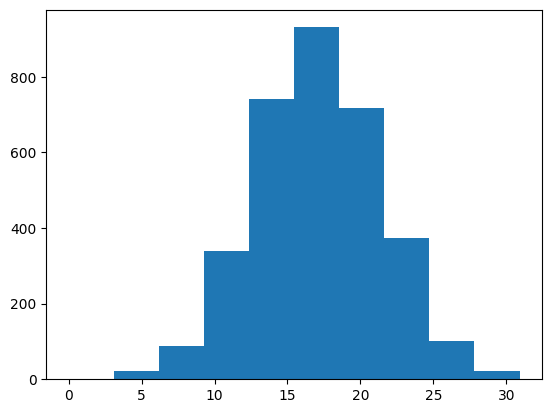

In [13]:
plt.hist(data['Eve Charge'])

Text(0.5, 1.0, 'Histograma del Número de llamadas por la tarde')

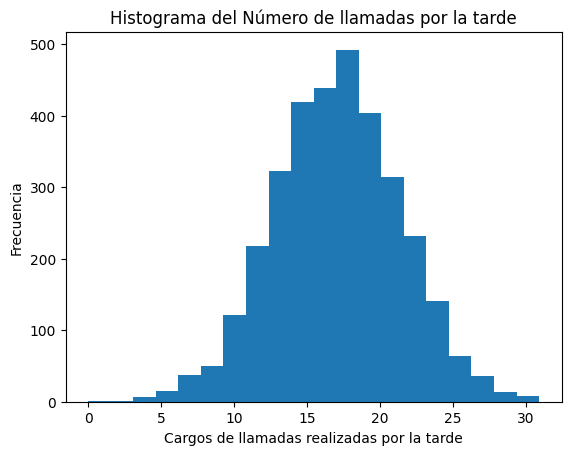

In [18]:
plt.hist(data['Eve Charge'], bins=20)
plt.xlabel("Cargos de llamadas realizadas por la tarde")
plt.ylabel("Frecuencia")
plt.title("Histograma del Número de llamadas por la tarde")

Text(0.5, 1.0, 'Histograma del Número de llamadas al día')

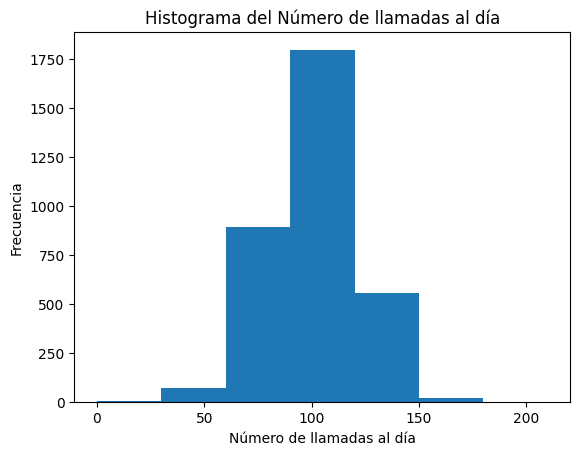

In [15]:
plt.hist(data['Day Calls'], bins=[0,30,60,90,120,150,180,210])
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma del Número de llamadas al día")

# NOTA: Habitualmente, en ESTADÍSTICA DESCRIPTIVA, el número de bines "c" a utilizar en un histograma viene dado por la "Regla de STURGES":
* C = 1 + log2(M), donde "M" es el tamaño de la muestra.
* C = 1 + log10(M)/log10(2), donde "M" es el tamaño de la muestra (a partir de log10).

In [19]:
data.shape

(3333, 21)

In [20]:
import numpy as np

In [21]:
c = int(np.ceil(1+np.log2(3333)))
c

13

Text(0.5, 1.0, 'Histograma del Número de llamadas al día')

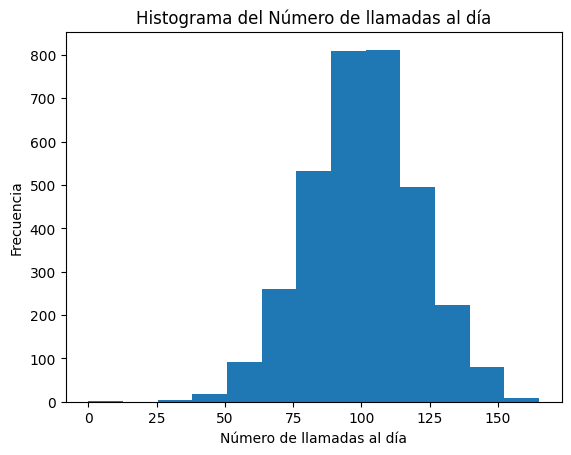

In [22]:
plt.hist(data['Day Calls'], bins=c)
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma del Número de llamadas al día")

## 3. Box Plots (Diagramas de Caja y Bigotes)

Text(0.5, 1.0, 'Boxplot de las llamadas de dia')

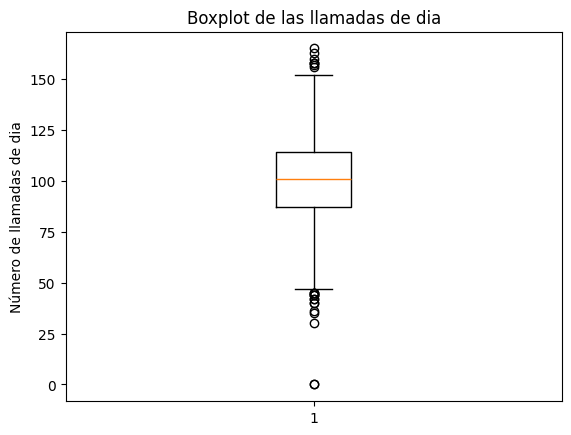

In [23]:
plt.boxplot(data["Day Calls"])
plt.ylabel("Número de llamadas de dia")
plt.title("Boxplot de las llamadas de dia")

### Interpretación de un Box Plot
* 1. La "caja" en el gráfico representa la mayor concentración de datos.
* 2. Los "límites" de la caja están dados por los valores estadísticos que representan a los cuantiles 25 y 75 (primero y tercer quantiles).

In [24]:
data["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

* 3. La altura de la caja esta dado por el llamado "Rango Intercuantilico" (IQR), el cual se calcula como la diferencia entre el  los valores que representan a los cuantiles 75 y 25 (tercer y primer quantiles).

In [25]:
Q75 = data["Day Calls"].quantile(0.75)
Q25 = data["Day Calls"].quantile(0.25)
IQR = Q75 - Q25
IQR

np.float64(27.0)

* 4. Los limites inferiores y superiores de los bigotes representan valor tales que corresponden a "el valor del primer cuantil (25%) MENOS 1.5 x IQR" y "el valor del tercer cuantil (75%) MAS 1.5 x IQR", respectivamente.
* 5. Los valores que se encuentran fuera del bigote se les conoce como "OUTLIERS"

In [26]:
# Calcular el valor inferior del bigote
whisker_min = Q25 - 1.5*IQR
whisker_min

np.float64(46.5)

In [27]:
# Calcular el valor superior del bigote
whisker_max = Q75 + 1.5*IQR
whisker_max

np.float64(154.5)

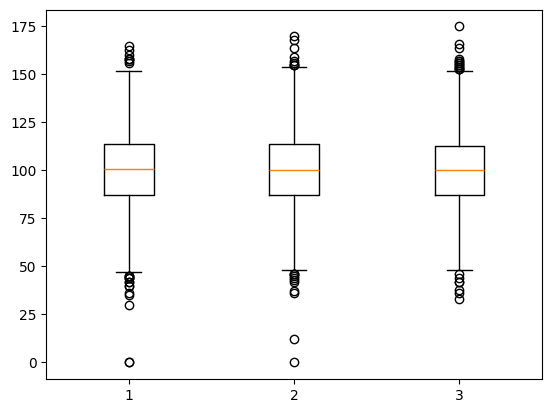

In [28]:
plt.boxplot(data[["Day Calls","Eve Calls","Night Calls"]]);

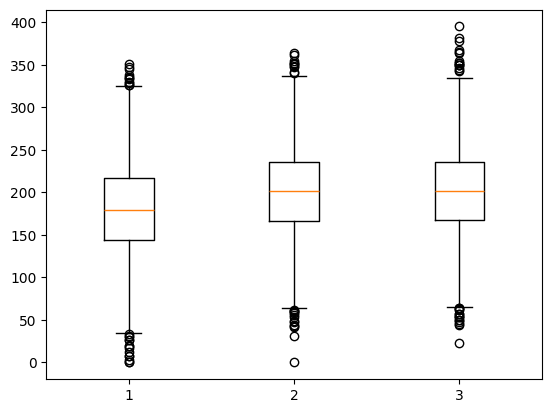

In [29]:
plt.boxplot(data[["Day Mins","Eve Mins","Night Mins"]]);